<a href="https://colab.research.google.com/github/papertuc2000/CL-Drive/blob/main/Plot_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot a sample

Mounting Google Drive...
Mounted at /content/drive
Found 21 participants: ['1372', '1717', '1434', '1744', '1716']...
✅ Loading file: /content/drive/MyDrive/Colab Notebooks/CL-Drive/ECG/1372/ecg_baseline_level_1.csv


/tmp/ipython-input-1662744846.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.replace(r'^\s*$', np.nan, regex=True).fillna(method='ffill').fillna(0)


Data shape: (142567, 7)


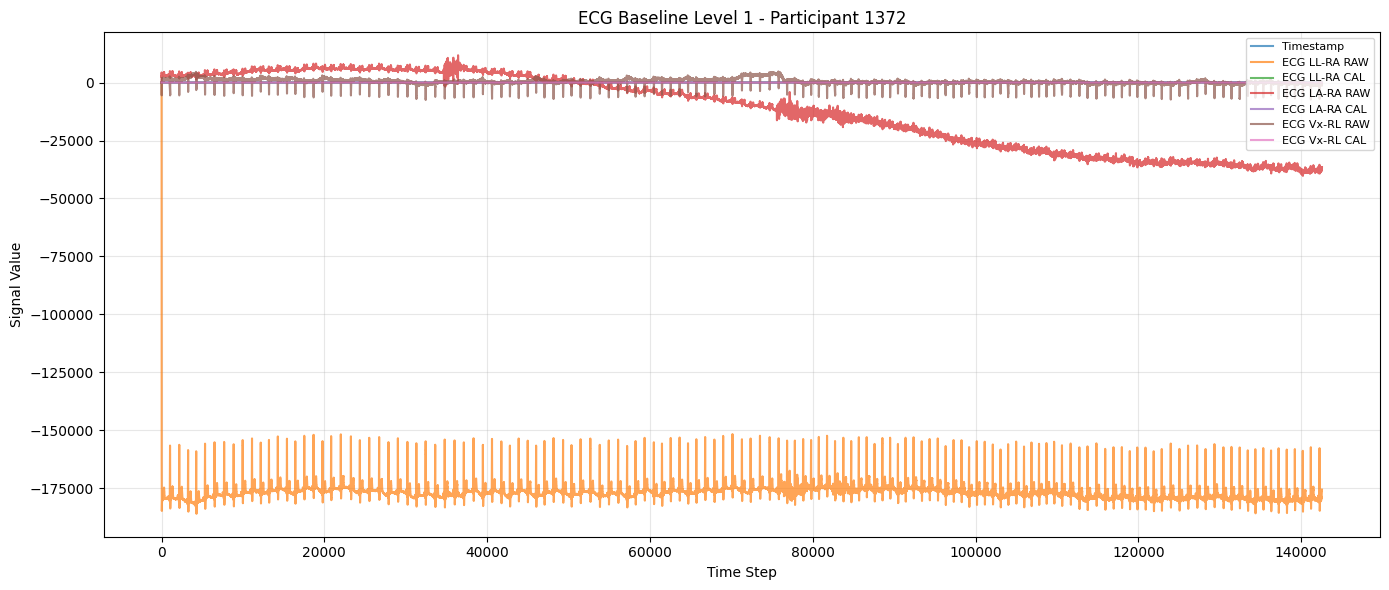

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from google.colab import drive

# 1. Mount Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# 2. Set Base Path
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/CL-Drive'

# 3. Define Paths based on YOUR screenshot
# We look directly inside the ECG folder for participant numbers (e.g., 1030)
ECG_FOLDER = os.path.join(BASE_PATH, 'ECG')

# Get a list of all participant folders (e.g., ['1030', '1105', ...])
participant_folders = [f for f in os.listdir(ECG_FOLDER) if os.path.isdir(os.path.join(ECG_FOLDER, f))]

if not participant_folders:
    raise FileNotFoundError(f"No participant folders found in {ECG_FOLDER}. Please check the path.")

print(f"Found {len(participant_folders)} participants: {participant_folders[:5]}...") # Show first 5

# 4. Pick ONE sample to plot (First participant, Level 1)
sample_participant = participant_folders[0]
level = 1

# Construct the search pattern matching your file names exactly
search_pattern = os.path.join(
    ECG_FOLDER,
    sample_participant,
    f"*baseline_level_{level}*.csv"
)

files = glob.glob(search_pattern)

if not files:
    print(f"❌ No file found for Participant {sample_participant}, Level {level}")
    print(f"Searched at: {search_pattern}")
else:
    file_path = files[0]
    print(f"✅ Loading file: {file_path}")

    # 5. Load and Clean Data
    df = pd.read_csv(file_path, header=0)

    # Handle the messy ",,,,," gaps seen in your files
    df = df.replace(r'^\s*$', np.nan, regex=True).fillna(method='ffill').fillna(0)

    # Keep only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    print(f"Data shape: {df_numeric.shape}")

    # 6. Plot
    plt.figure(figsize=(14, 6))

    # Plot all available channels
    for col in df_numeric.columns:
        if df_numeric[col].sum() != 0: # Skip empty columns
            plt.plot(df_numeric.index, df_numeric[col], label=col, alpha=0.7)

    plt.title(f'ECG Baseline Level {level} - Participant {sample_participant}')
    plt.xlabel('Time Step')
    plt.ylabel('Signal Value')
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()